In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data ingestion

In [2]:
import chardet

# Detect the encoding
with open("../data/PHP_21_3_24_E_60FR_100W_90A_0B.csv", "rb") as file:
    result = chardet.detect(file.read())
    print(result['encoding'])


UTF-16


In [3]:
# loading raw data
# experiment 60FR 100W DI Water
# DATE: 21 3 2024

# loading thermal data
df_raw_60FR_100W_Therm = pd.read_csv("../data/PHP_21_3_24_T_60FR_100W_90A_0B.csv", encoding='UTF_16',delimiter='\t')

# loading electrical data
df_raw_60FR_100W_Elect = pd.read_csv("../data/PHP_21_3_24_E_60FR_100W_90A_0B.csv", encoding='UTF_16',delimiter='\t')

In [4]:
display(df_raw_60FR_100W_Therm)

,TIME,DATE,TC-1,TC-2,TC-3,TC-4,TC-5,TC-6,TC-7,TC-8,TC-9,PRESSURE,HEATER,HEATER SET POINT,Unnamed: 14
0,NaN,22/02/2024,36.5,36.2,35.5,35.3,34.7,29.3,29.0,29.0,26.5,-0.69,47,170,NaN
1,15:57:39,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.3,29.0,29.0,26.5,-0.69,47,170,NaN
2,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.69,47,170,NaN
3,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,NaN
4,15:57:45,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13715,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,NaN
13716,18:23:42,21/03/2024,95.6,95.2,94.9,96.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,NaN
13717,18:23:43,21/03/2024,95.6,95.2,94.9,96.3,86.7,78.7,89.6,82.9,103.7,0.83,134,170,NaN
13718,18:23:45,21/03/2024,95.6,95.2,94.9,96.3,86.7,78.7,89.6,82.9,102.4,0.72,134,170,NaN


In [5]:
display(df_raw_60FR_100W_Elect)

,TIME,DATE,voltage,current,power,Unnamed: 5
0,NaN,22/02/2024,82.1,1.216,100.2,NaN
1,15:57:38,22/02/2024,82.1,1.216,100.2,NaN
2,15:57:40,22/02/2024,82.1,1.216,100.0,NaN
3,15:57:42,22/02/2024,82.1,1.216,100.0,NaN
4,15:57:44,22/02/2024,82.1,1.216,99.9,NaN
...,...,...,...,...,...,...
13716,18:23:41,21/03/2024,84.1,1.235,104.0,NaN
13717,18:23:43,21/03/2024,84.1,1.234,104.0,NaN
13718,18:23:44,21/03/2024,84.1,1.235,104.0,NaN
13719,18:23:48,21/03/2024,84.0,1.234,103.8,NaN


In [6]:
df_raw_60FR_100W_Therm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13720 entries, 0 to 13719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIME              13719 non-null  object 
 1   DATE              13720 non-null  object 
 2   TC-1              13720 non-null  float64
 3   TC-2              13720 non-null  float64
 4   TC-3              13720 non-null  float64
 5   TC-4              13720 non-null  float64
 6   TC-5              13720 non-null  float64
 7   TC-6              13720 non-null  float64
 8   TC-7              13720 non-null  float64
 9   TC-8              13720 non-null  float64
 10  TC-9              13720 non-null  float64
 11  PRESSURE          13720 non-null  float64
 12  HEATER            13720 non-null  int64  
 13  HEATER SET POINT  13720 non-null  int64  
 14  Unnamed: 14       0 non-null      float64
dtypes: float64(11), int64(2), object(2)
memory usage: 1.6+ MB


In [7]:
def process_datetime(df:pd.DataFrame, col:str='date')->pd.DataFrame:
    df[col] = df['DATE'] + df['TIME']
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y%H:%M:%S')
    return df

In [8]:
df_raw_60FR_100W_Elect = process_datetime(df_raw_60FR_100W_Elect)
df_raw_60FR_100W_Therm = process_datetime(df_raw_60FR_100W_Therm)

In [9]:
def join_thermal_electrical_data(df_thermal:pd.DataFrame, df_electrical:pd.DataFrame)->pd.DataFrame:
    df_join = pd.merge(left=df_thermal, right=df_electrical, on=['date', 'TIME', 'DATE'])
    df_join.dropna(axis=1, how='all', inplace=True)
    df_join.dropna(axis=0, how='any', inplace=True)
    df_join.rename(columns=lambda x: x.replace('-', '_'), inplace=True)
    return df_join

In [10]:
df_raw_60FR_100W = join_thermal_electrical_data(df_thermal=df_raw_60FR_100W_Therm,
                                                df_electrical=df_raw_60FR_100W_Elect)

In [11]:
display(df_raw_60FR_100W)

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,PRESSURE,HEATER,HEATER SET POINT,date,voltage,current,power
1,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.69,47,170,2024-02-22 15:57:40,82.1,1.216,100.0
2,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,2024-02-22 15:57:42,82.1,1.216,100.0
3,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,2024-02-22 15:57:49,82.1,1.216,99.9
4,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,2024-02-22 15:57:49,82.1,1.215,99.7
5,15:57:55,22/02/2024,37.3,37.5,36.8,36.6,36.1,29.3,28.9,29.0,26.5,-0.68,49,170,2024-02-22 15:57:55,82.1,1.215,99.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,18:23:36,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,2024-03-21 18:23:36,84.1,1.235,104.0
10650,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,2024-03-21 18:23:41,84.1,1.235,104.0
10651,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,2024-03-21 18:23:41,84.1,1.235,104.0
10652,18:23:43,21/03/2024,95.6,95.2,94.9,96.3,86.7,78.7,89.6,82.9,103.7,0.83,134,170,2024-03-21 18:23:43,84.1,1.234,104.0


In [12]:
df_raw_60FR_100W.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10653 entries, 1 to 10653
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TIME              10653 non-null  object        
 1   DATE              10653 non-null  object        
 2   TC_1              10653 non-null  float64       
 3   TC_2              10653 non-null  float64       
 4   TC_3              10653 non-null  float64       
 5   TC_4              10653 non-null  float64       
 6   TC_5              10653 non-null  float64       
 7   TC_6              10653 non-null  float64       
 8   TC_7              10653 non-null  float64       
 9   TC_8              10653 non-null  float64       
 10  TC_9              10653 non-null  float64       
 11  PRESSURE          10653 non-null  float64       
 12  HEATER            10653 non-null  int64         
 13  HEATER SET POINT  10653 non-null  int64         
 14  date              10653 non

In [13]:
df_raw_60FR_100W.set_index('date')

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,PRESSURE,HEATER,HEATER SET POINT,voltage,current,power
date,,,,,,,,,,,,,,,,,
2024-02-22 15:57:40,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.69,47,170,82.1,1.216,100.0
2024-02-22 15:57:42,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,82.1,1.216,100.0
2024-02-22 15:57:49,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,82.1,1.216,99.9
2024-02-22 15:57:49,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,29.0,26.5,-0.68,48,170,82.1,1.215,99.7
2024-02-22 15:57:55,15:57:55,22/02/2024,37.3,37.5,36.8,36.6,36.1,29.3,28.9,29.0,26.5,-0.68,49,170,82.1,1.215,99.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21 18:23:36,18:23:36,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,84.1,1.235,104.0
2024-03-21 18:23:41,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,84.1,1.235,104.0
2024-03-21 18:23:41,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,90.8,81.5,103.7,0.83,134,170,84.1,1.235,104.0


In [64]:
df_raw_60FR_100W.columns.to_list()

['TIME',
 'DATE',
 'TC_1',
 'TC_2',
 'TC_3',
 'TC_4',
 'TC_5',
 'TC_6',
 'TC_7',
 'TC_8',
 'TC_9',
 'PRESSURE',
 'HEATER',
 'HEATER SET POINT',
 'date',
 'voltage',
 'current',
 'power']

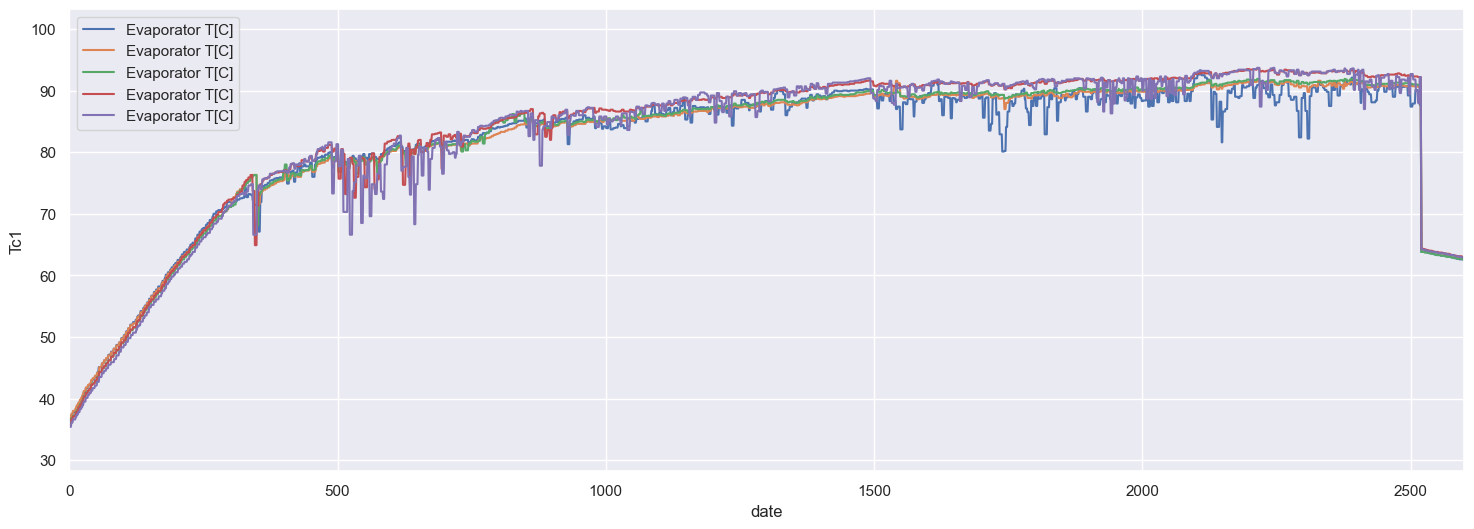

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df_raw_60FR_100W[['TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5']], label=f'Evaporator T[C]')
plt.xlabel('date')
plt.ylabel('Tc1')
plt.xlim(0,2600)
plt.legend()
plt.show()

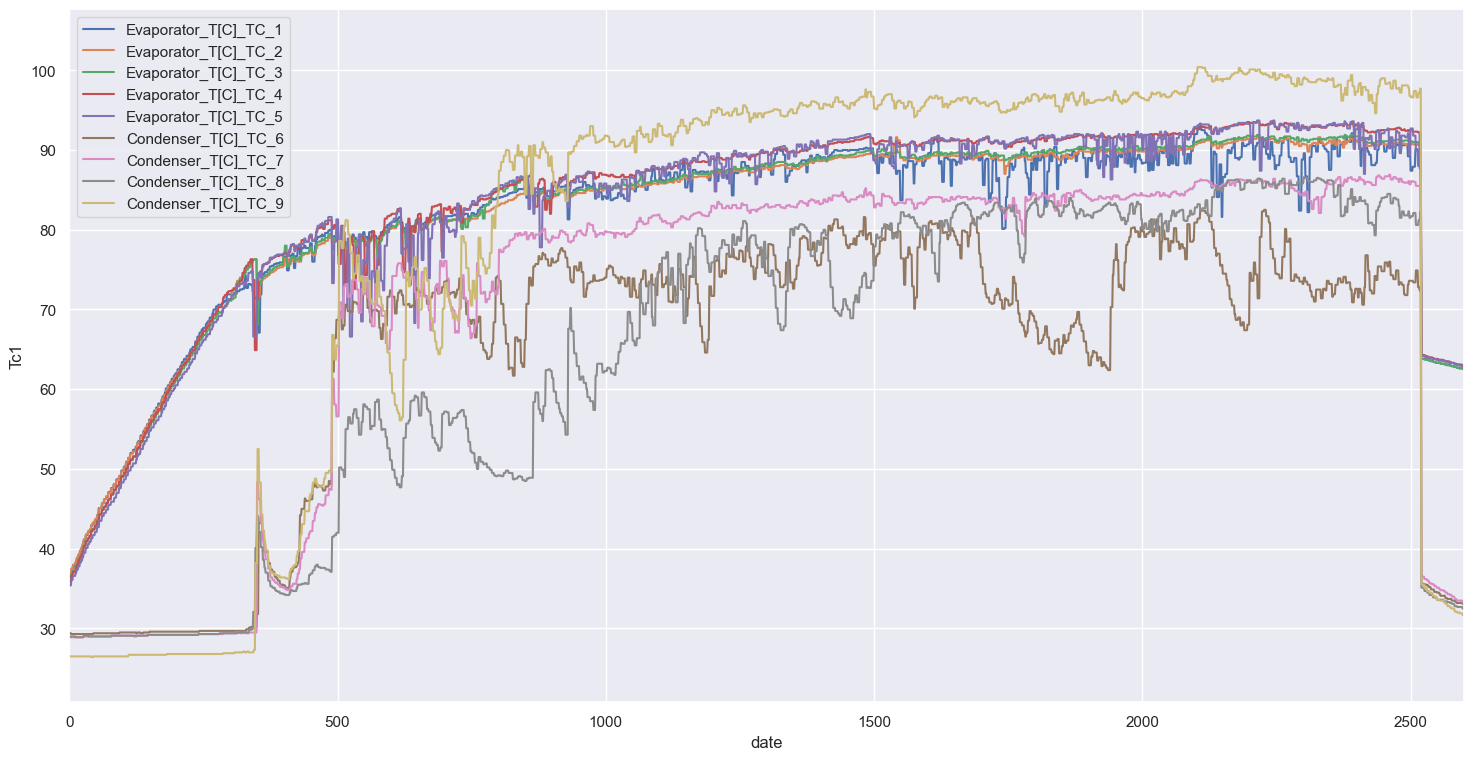

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 9))
for tc in df_raw_60FR_100W.columns.to_list():
    if tc.startswith("TC_"):
        if tc.split('_')[1] in ['6', '7', '8', '9']:
            e = 'Condenser'
            c = 'b'
        else:
            e = 'Evaporator'
            c = 'r'
        plt.plot(df_raw_60FR_100W[tc], label=f'{e}_T[C]_{tc}')
plt.xlabel('date')
plt.ylabel('Tc1')
plt.xlim(0,2600)
plt.legend()

plt.show()

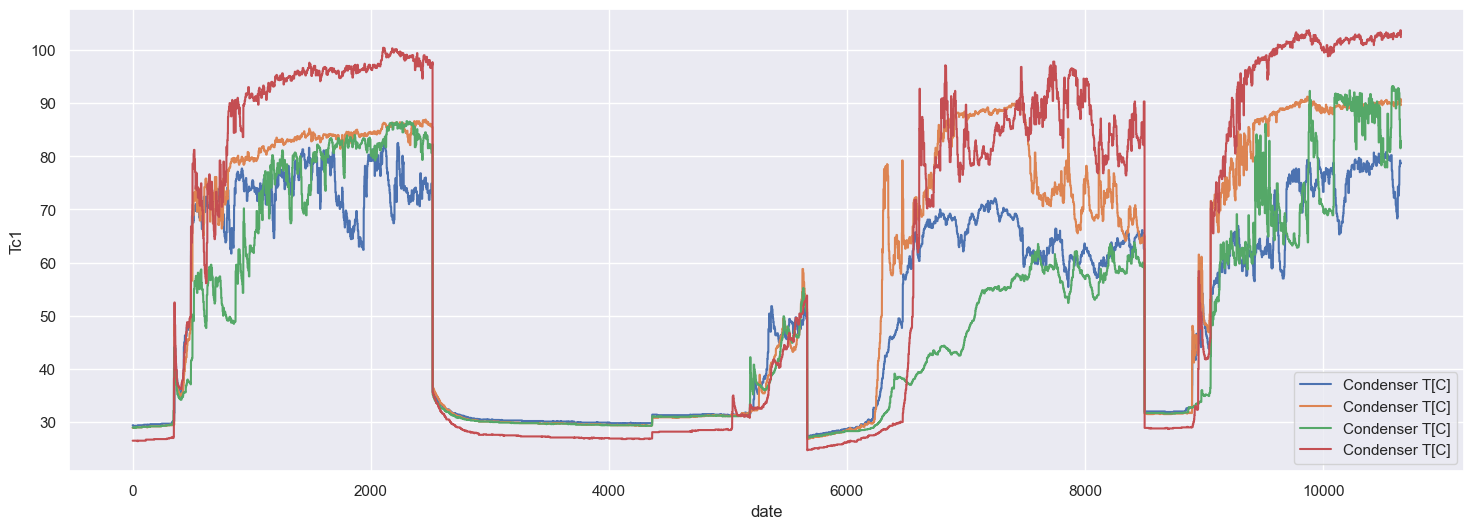

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df_raw_60FR_100W[['TC_6','TC_7','TC_8', 'TC_9']], label='Condenser T[C]')
plt.xlabel('date')
plt.ylabel('Tc1')
# plt.xlim(0,2600)
plt.legend()
plt.show()

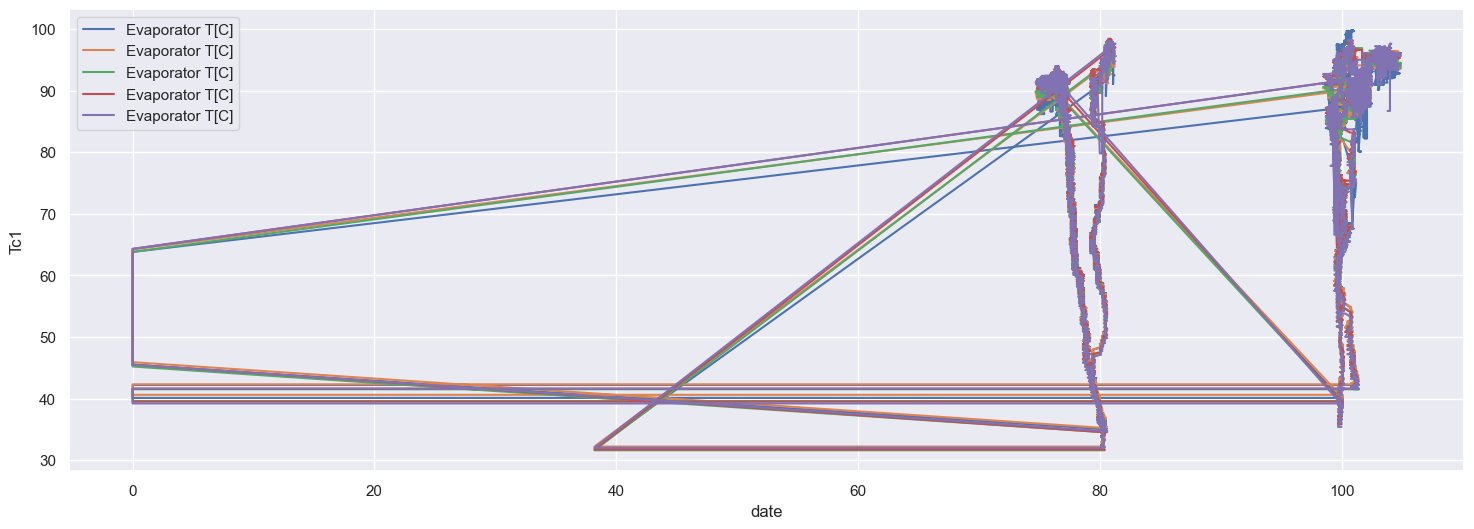

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df_raw_60FR_100W['power'] ,df_raw_60FR_100W[['TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5']], label='Evaporator T[C]')
plt.xlabel('date')
plt.ylabel('Tc1')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


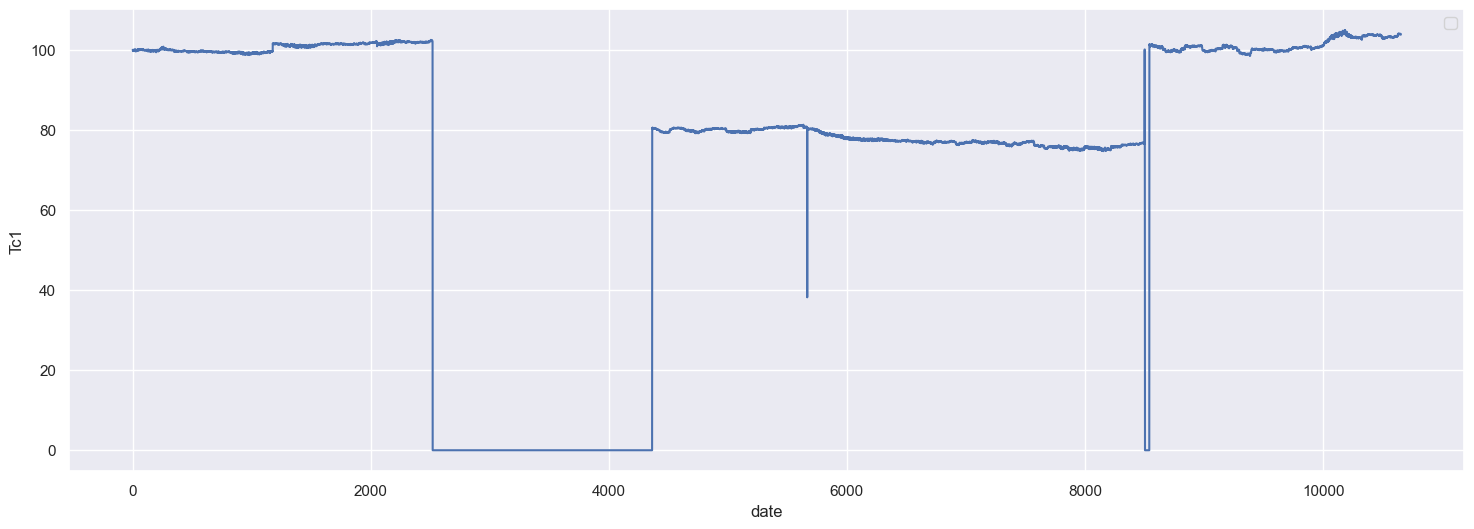

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df_raw_60FR_100W['power'])
plt.xlabel('date')
plt.ylabel('Tc1')
plt.legend()
plt.show()

In [149]:
df_raw_60FR_100W['Te_mean'] = df_raw_60FR_100W[['TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5']].mean(axis=1)
df_raw_60FR_100W['Tc_mean'] = df_raw_60FR_100W[['TC_6','TC_7','TC_8', 'TC_9']].mean(axis=1)
df_raw_60FR_100W['Te_std'] = df_raw_60FR_100W[['TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5']].std(axis=1)
df_raw_60FR_100W['Tc_std'] = df_raw_60FR_100W[['TC_6','TC_7','TC_8', 'TC_9']].std(axis=1)
df_raw_60FR_100W.head()

,index,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,...,HEATER,HEATER SET POINT,date,voltage,current,power,Te_mean,Tc_mean,Te_std,Tc_std
0,1,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,...,47,170,2024-02-22 15:57:40,82.1,1.216,100.0,36.10,28.450,0.556776,1.317826
1,2,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,...,48,170,2024-02-22 15:57:42,82.1,1.216,100.0,36.10,28.450,0.556776,1.317826
2,3,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,...,48,170,2024-02-22 15:57:49,82.1,1.216,99.9,36.10,28.450,0.556776,1.317826
3,4,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,...,48,170,2024-02-22 15:57:49,82.1,1.215,99.7,36.10,28.450,0.556776,1.317826
4,5,15:57:55,22/02/2024,37.3,37.5,36.8,36.6,36.1,29.3,28.9,...,49,170,2024-02-22 15:57:55,82.1,1.215,99.8,36.86,28.425,0.559464,1.294540


In [150]:
df_raw_60FR_100W.reset_index()

,level_0,index,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,...,HEATER,HEATER SET POINT,date,voltage,current,power,Te_mean,Tc_mean,Te_std,Tc_std
0,0,1,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,...,47,170,2024-02-22 15:57:40,82.1,1.216,100.0,36.10,28.450,0.556776,1.317826
1,1,2,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,...,48,170,2024-02-22 15:57:42,82.1,1.216,100.0,36.10,28.450,0.556776,1.317826
2,2,3,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,...,48,170,2024-02-22 15:57:49,82.1,1.216,99.9,36.10,28.450,0.556776,1.317826
3,3,4,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,...,48,170,2024-02-22 15:57:49,82.1,1.215,99.7,36.10,28.450,0.556776,1.317826
4,4,5,15:57:55,22/02/2024,37.3,37.5,36.8,36.6,36.1,29.3,...,49,170,2024-02-22 15:57:55,82.1,1.215,99.8,36.86,28.425,0.559464,1.294540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648,10648,10649,18:23:36,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,...,134,170,2024-03-21 18:23:36,84.1,1.235,104.0,95.98,88.650,0.772658,11.302655
10649,10649,10650,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,...,134,170,2024-03-21 18:23:41,84.1,1.235,104.0,95.98,88.650,0.772658,11.302655
10650,10650,10651,18:23:41,21/03/2024,96.0,95.4,95.7,97.3,95.5,78.6,...,134,170,2024-03-21 18:23:41,84.1,1.235,104.0,95.98,88.650,0.772658,11.302655
10651,10651,10652,18:23:43,21/03/2024,95.6,95.2,94.9,96.3,86.7,78.7,...,134,170,2024-03-21 18:23:43,84.1,1.234,104.0,93.74,88.725,3.970264,10.946042


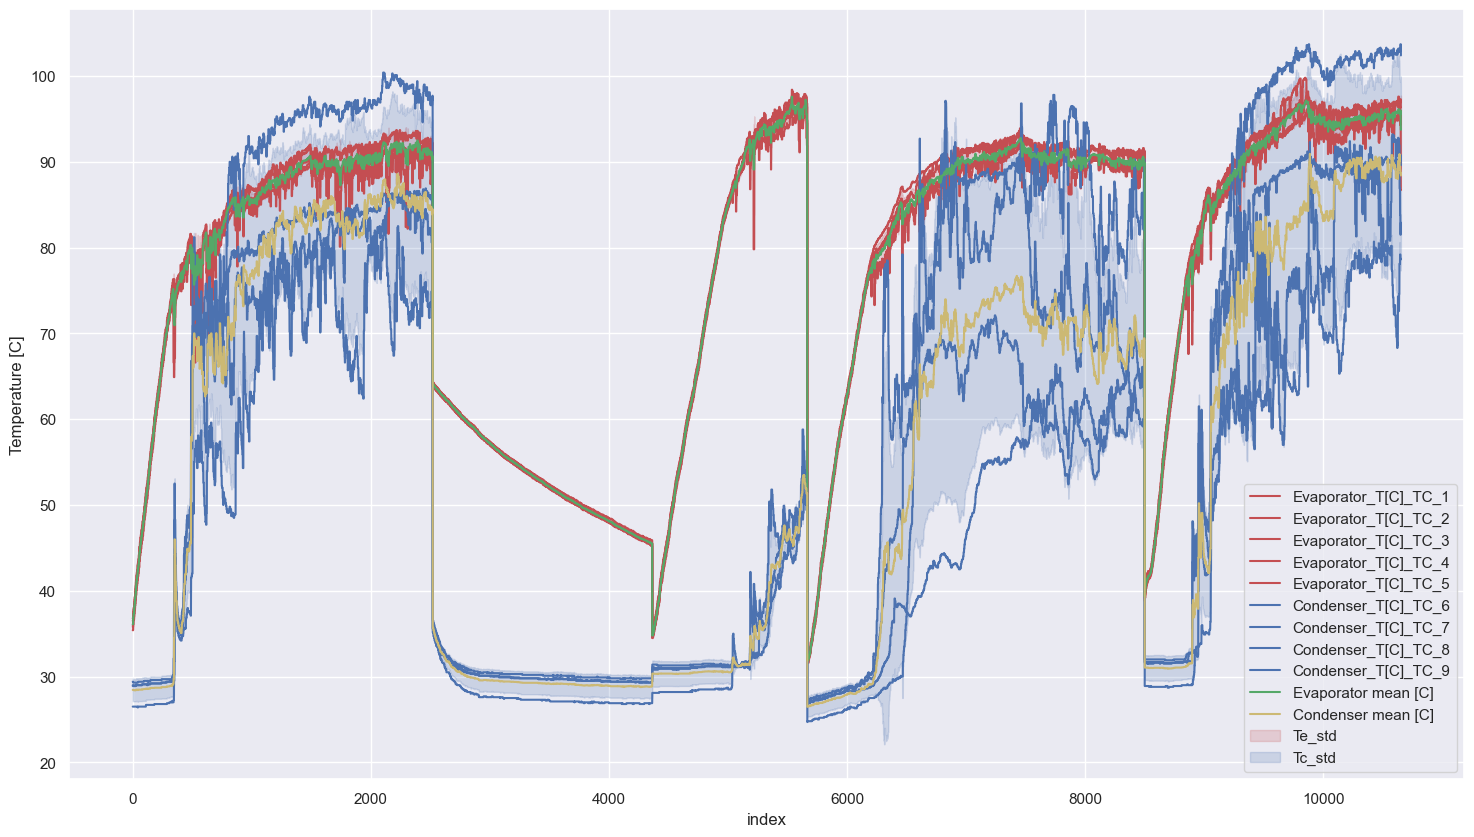

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
for tc in df_raw_60FR_100W.columns.to_list():
    if tc.startswith("TC_"):
        if tc.split('_')[1] in ['6', '7', '8', '9']:
            e = 'Condenser'
            c = 'b'
        else:
            e = 'Evaporator'
            c = 'r'
        plt.plot(df_raw_60FR_100W['index'], df_raw_60FR_100W[tc], c=c, label=f'{e}_T[C]_{tc}')
plt.plot(df_raw_60FR_100W['index'], df_raw_60FR_100W['Te_mean'], c='g', label='Evaporator mean [C]')
plt.plot(df_raw_60FR_100W['index'], df_raw_60FR_100W['Tc_mean'], c='y', label='Condenser mean [C]')
plt.fill_between(x=df_raw_60FR_100W['index'],
                 y1=df_raw_60FR_100W['Te_mean']-df_raw_60FR_100W['Te_std'],
                 y2=df_raw_60FR_100W['Te_mean']+df_raw_60FR_100W['Te_std'],
                 color='r',
                 alpha=0.2,
                 label='Te_std')
plt.fill_between(x=df_raw_60FR_100W['index'],
                 y1=df_raw_60FR_100W['Tc_mean']-df_raw_60FR_100W['Tc_std'],
                 y2=df_raw_60FR_100W['Tc_mean']+df_raw_60FR_100W['Tc_std'],
                 color='b',
                 alpha=0.2,
                 label='Tc_std')
plt.xlabel('index')
plt.ylabel('Temperature [C]')
# plt.xlim(0,3000)
plt.legend()

plt.show()

In [154]:
# data chopping for given experiment timestamp

df_raw_60FR_100W.head()

,index,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,...,HEATER,HEATER SET POINT,date,voltage,current,power,Te_mean,Tc_mean,Te_std,Tc_std
0,1,15:57:40,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,...,47,170,2024-02-22 15:57:40,82.1,1.216,100.0,36.10,28.450,0.556776,1.317826
1,2,15:57:42,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,...,48,170,2024-02-22 15:57:42,82.1,1.216,100.0,36.10,28.450,0.556776,1.317826
2,3,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,...,48,170,2024-02-22 15:57:49,82.1,1.216,99.9,36.10,28.450,0.556776,1.317826
3,4,15:57:49,22/02/2024,36.5,36.8,36.0,35.8,35.4,29.4,28.9,...,48,170,2024-02-22 15:57:49,82.1,1.215,99.7,36.10,28.450,0.556776,1.317826
4,5,15:57:55,22/02/2024,37.3,37.5,36.8,36.6,36.1,29.3,28.9,...,49,170,2024-02-22 15:57:55,82.1,1.215,99.8,36.86,28.425,0.559464,1.294540


In [ ]:
def load_meta_table(path:str='../data/meta_table_data.csv'):
    # csv load
    df = pd.read_csv(path)
    return df